# Shader 
Determine hex values for CCM overview figures

In [129]:
import os
import sys
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import matplotlib.cm as cm

__path__ = os.getcwd()
data_url = os.path.abspath(os.path.join(__path__, "..", "..", "data", "sce_mct1_omics"))

print(data_url)

C:\Users\jorda\Desktop\projects\Metaboverse-manuscript\data\sce_mct1_omics


### Generate colormap

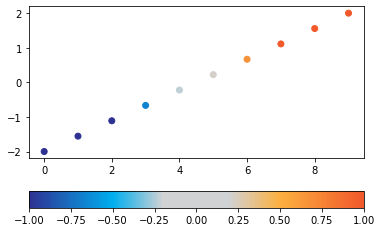

In [148]:
norm = matplotlib.colors.Normalize(-1,1)
colors = [[norm(-1.0), "#2e3192"],
          [norm(-0.5), "#00aeef"],
          [norm(-0.2), "#d1d2d4"],
          [norm( 0.0), "#d1d2d4"],
          [norm( 0.2), "#d1d2d4"],
          [norm( 0.5), "#fcb040"],
          [norm( 1.0), "#f1592a"]]

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
m = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax=plt.subplots()
x = np.arange(10)
y = np.linspace(-2,2,10)
sc = ax.scatter(x,y, c=y, norm=norm, cmap=cmap)
fig.colorbar(sc, orientation="horizontal")
plt.show()

fig.savefig(os.path.join(__path__, "colorbar.pdf"))

### Gene mapper

In [98]:
gtf = pd.read_csv(
    os.path.join(
        __path__,
        "..",
        "data",
        "analysis_lists",
        "Saccharomyces_cerevisiae.R64-1-1.103.gtf.gz"),
    sep='\t',
    comment='#',
    low_memory=False,
    header=None)

In [99]:
orig_name_label='gene_id "'
orig_name_location=0
new_name_label='gene_name "'
new_name_location=1
gtf_genes = gtf.loc[gtf[2] == 'gene']
gtf_genes['original'] = gtf[8].str.split(';').str[orig_name_location]
gtf_genes['new'] = gtf[8].str.split(';').str[new_name_location]
gtf_genes['original'] = gtf_genes['original'].map(lambda x: x.lstrip(str(orig_name_label)).rstrip('"').lstrip('"').rstrip(' '))
gtf_genes['new'] = gtf_genes['new'].map(lambda x: x.lstrip(str(new_name_label)).rstrip('"').rstrip(' '))
gtf_genes = gtf_genes[['original','new']].copy()

C:\Users\jorda\AppData\Local\Temp/ipykernel_46632/1726529972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtf_genes['original'] = gtf[8].str.split(';').str[orig_name_location]
C:\Users\jorda\AppData\Local\Temp/ipykernel_46632/1726529972.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtf_genes['new'] = gtf[8].str.split(';').str[new_name_location]
C:\Users\jorda\AppData\Local\Temp/ipykernel_46632/1726529972.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [100]:
gene_dict = {}
for index, row in gtf_genes.iterrows():
    if row[1] == 'source "sgd':
        gene_dict[row[0]] = row[0]
    else:
        gene_dict[row[0]] = row[1]

### Selections

In [139]:
genes = [
    'GLK1',
    'PGI1',
    'PFK1', 'PFK2',
    'FBP1',
    'FBA1', 'TPI1',
    'TDH1', 'TDH2', 'TDH3',
    'PGK1',
    'GPM1',
    'ENO1', 'ENO2',
    'PYK2', 'CDC19',
    'PYC1', 'PYC2',
    'CIT1', 'CIT2', 'CIT3',
    'ACO1', 'ACO2',
    'IDH1', 'IDH2',
    'LPD1', 'KGD1', 'KGD2',
    'LSC1', 'LSC2',
    'SDH1', 'SDH2', 'SDH3', 'SDH4',
    'FUM1',
    'MDH1',
    'GDH1', 'GDH2', 'GLN1',
    'ALT1', 'ALT2',
    'DLD1', 'DLD2', 'DLD3',
    'MAE1',
    'AAT1',
    'CTP1', 'DIC1'
]

gc_metabolomics = [
    'Glucose 6-phosphate',
    'Fructose-6-phosphate',
    'fructose-1,6-diphosphate',
    '3-Phosphoglyceric acid',
    'Phosphoenolpyruvate',
    'Pyruvic acid',
    'Glyoxylic acid',
    'Citric acid',
    'Isocitric acid',
    'Succinic acid',
    'Fumaric acid',
    'D-Malic acid',
    'L-Alanine',
    'L-Lactic acid',
    'L-Aspartic acid',
    'L-Glutamic acid',
    '2-Hydroxyglutaric acid',
]

lc_metabolomics = [
    'Glucose',
    'F6P',
    'F16BP',
    'Pyruvate',
    'CoA',
    'Citrate',
    'a-KG',
    'Succinate',
    'Fumarate',
    'Malate',
    'Glutamate',
    'Glutamine',
    'Aspartate',
    'Alanine'
]

### 3 hr mct1-del vs WT

In [107]:
transcriptomics_3hr = os.path.abspath(os.path.join(data_url, "sce_mct1_03hr_counts_diffx.txt"))
metabolomics_3hr = os.path.abspath(os.path.join(data_url, "metabolomics_timecourse_mct1.txt"))

In [108]:
mct1_3hr_transcriptomics = pd.read_csv(
    transcriptomics_3hr,
    sep='\t',
    index_col=0)

mct1_3hr_metabolomics = pd.read_csv(
    metabolomics_3hr,
    sep='\t',
    index_col=0)

In [109]:
mct1_3hr_transcriptomics_renamed = mct1_3hr_transcriptomics.copy()
mct1_3hr_transcriptomics_renamed['new'] = mct1_3hr_transcriptomics_renamed.index.to_series().map(gene_dict).fillna(
    mct1_3hr_transcriptomics_renamed.index.to_series())
mct1_3hr_transcriptomics_renamed = mct1_3hr_transcriptomics_renamed.set_index('new')
mct1_3hr_transcriptomics_renamed.index.name = None

In [119]:
for x in genes:
    if x in mct1_3hr_transcriptomics_renamed.index:
        _hex = ""
        _value = 0.
        if mct1_3hr_transcriptomics_renamed.loc[x][0] < -2:
            _value = -1.0
        elif mct1_3hr_transcriptomics_renamed.loc[x][0] > 2:
            _value = 1.0
        else:
            _value = round(mct1_3hr_transcriptomics_renamed.loc[x][0] / 2, 1)
        _rgba = m.to_rgba(_value)
        _hex = matplotlib.colors.rgb2hex(_rgba)
        
        _stat = ""
        if mct1_3hr_transcriptomics_renamed.loc[x][1] < 0.1:
            _stat = "* "
        if mct1_3hr_transcriptomics_renamed.loc[x][1] < 0.05:
            _stat = "** "
        if mct1_3hr_transcriptomics_renamed.loc[x][1] < 0.01:
            _stat = "*** "
        
        print(str(x) + "\t" + str(_value) + "\t" + str(_hex) + "\t\t" + str(_stat) + str(mct1_3hr_transcriptomics_renamed.loc[x][1]))
    else:
        print(x)

GLK1	-0.0	#d1d2d4		0.981976543
PGI1	-0.1	#d1d2d4		0.326110216
PFK1	-0.1	#d1d2d4		0.481721105
PFK2	-0.1	#d1d2d4		0.828509288
FBP1	-0.2	#d1d2d4		* 0.053250244
FBA1	-0.1	#d1d2d4		0.802863827
TPI1	-0.1	#d1d2d4		0.531169334
TDH1	-0.1	#d1d2d4		0.311551329
TDH2	-0.1	#d1d2d4		0.392266667
TDH3	-0.0	#d1d2d4		0.881038177
PGK1	-0.1	#d1d2d4		0.696111097
GPM1	-0.1	#d1d2d4		0.732199812
ENO1	-0.1	#d1d2d4		0.306261994
ENO2	-0.1	#d1d2d4		** 0.010753632
PYK2	-0.0	#d1d2d4		0.975115575
CDC19	-0.1	#d1d2d4		0.240368004
PYC1	0.1	#d1d2d4		0.174006531
PYC2	-0.2	#d1d2d4		** 0.011950815
CIT1	0.0	#d1d2d4		0.998926995
CIT2	0.4	#eebb6f		*** 0.000671371
CIT3	0.7	#f88d37		*** 3.99e-44
ACO1	0.1	#d1d2d4		0.447458383
ACO2	0.0	#d1d2d4		0.918729624
IDH1	0.1	#d1d2d4		0.295118242
IDH2	0.1	#d1d2d4		0.491803054
LPD1	-0.1	#d1d2d4		* 0.077265822
KGD1	-0.2	#d1d2d4		*** 0.000250432
KGD2	-0.1	#d1d2d4		*** 4.99e-05
LSC1	-0.0	#d1d2d4		0.859515689
LSC2	0.0	#d1d2d4		0.979740767
SDH1	-0.2	#d1d2d4		*** 0.000174258
SDH2	-0.1	#d1d2d4		0.44

In [120]:
for x in gc_metabolomics:
    if x in mct1_3hr_metabolomics[["180min_mct1_lfc", "180min_mct1_bh"]].index:
        _hex = ""
        _value = 0.
        if mct1_3hr_metabolomics[["180min_mct1_lfc", "180min_mct1_bh"]].loc[x][0] < -2:
            _value = -1.0
        elif mct1_3hr_metabolomics[["180min_mct1_lfc", "180min_mct1_bh"]].loc[x][0] > 2:
            _value = 1.0
        else:
            _value = round(mct1_3hr_metabolomics[["180min_mct1_lfc", "180min_mct1_bh"]].loc[x][0] / 2, 1)
        _rgba = m.to_rgba(_value)
        _hex = matplotlib.colors.rgb2hex(_rgba)
        
        _stat = ""
        if mct1_3hr_metabolomics[["180min_mct1_lfc", "180min_mct1_bh"]].loc[x][1] < 0.1:
            _stat = "* "
        if mct1_3hr_metabolomics[["180min_mct1_lfc", "180min_mct1_bh"]].loc[x][1] < 0.05:
            _stat = "** "
        if mct1_3hr_metabolomics[["180min_mct1_lfc", "180min_mct1_bh"]].loc[x][1] < 0.01:
            _stat = "*** "
        
        print(str(x) + "\t" + str(_value) + "\t" + str(_hex) + "\t\t" + str(_stat) + str(mct1_3hr_metabolomics[["180min_mct1_lfc", "180min_mct1_bh"]].loc[x][1]))
    else:
        print(x)

Glucose 6-phosphate	-0.1	#d1d2d4		0.123194323
Fructose-6-phosphate	0.0	#d1d2d4		0.609531159
fructose-1,6-diphosphate	0.6	#fa9f3c		0.118707906
3-Phosphoglyceric acid	-0.4	#43bae6		* 0.067758917
Phosphoenolpyruvate	-0.4	#43bae6		*** 0.005212245
Pyruvic acid	-0.0	#d1d2d4		0.302827087
Glyoxylic acid	0.4	#eebb6f		0.298275633
Citric acid	-1.0	#2e3192		*** 0.000794148
Isocitric acid	0.4	#eebb6f		0.231108824
Succinic acid	0.2	#d1d2d4		0.747466905
Fumaric acid	0.8	#f57b33		*** 3.51e-05
D-Malic acid	1.0	#f1592a		*** 0.000147372
L-Alanine	1.0	#f1592a		*** 4.17e-05
L-Lactic acid	0.3	#e0c6a2		0.439740985
L-Aspartic acid	0.6	#fa9f3c		*** 0.009430318
L-Glutamic acid	-0.6	#0995dc		*** 0.001854925
2-Hydroxyglutaric acid	1.0	#f1592a		** 0.011745302


### 12 hr mct1-del vs WT

In [123]:
proteomics_12hr = os.path.abspath(os.path.join(data_url, "proteomics_mct1_12hr.txt"))
metabolomics_12hr_mct1 = os.path.abspath(os.path.join(data_url, "mct1_12hr_metabolomics.txt"))

In [124]:
mct1_12hr_proteomics = pd.read_csv(
    proteomics_12hr,
    sep='\t',
    index_col=0)

mct1_12hr_metabolomics = pd.read_csv(
    metabolomics_12hr_mct1,
    sep='\t',
    index_col=0)

In [125]:
for x in genes:
    if x in mct1_12hr_proteomics.index:
        _hex = ""
        _value = 0.
        if mct1_12hr_proteomics.loc[x][0] < -2:
            _value = -1.0
        elif mct1_12hr_proteomics.loc[x][0] > 2:
            _value = 1.0
        else:
            _value = round(mct1_12hr_proteomics.loc[x][0] / 2, 1)
        _rgba = m.to_rgba(_value)
        _hex = matplotlib.colors.rgb2hex(_rgba)
        
        _stat = ""
        if mct1_12hr_proteomics.loc[x][1] < 0.1:
            _stat = "* "
        if mct1_12hr_proteomics.loc[x][1] < 0.05:
            _stat = "** "
        if mct1_12hr_proteomics.loc[x][1] < 0.01:
            _stat = "*** "
        
        print(str(x) + "\t" + str(_value) + "\t" + str(_hex) + "\t\t" + str(_stat) + str(mct1_12hr_proteomics.loc[x][1]))
    else:
        print(x)

GLK1	0.0	#d1d2d4		0.625266003
PGI1	0.2	#d1d2d4		* 0.084813715
PFK1	0.1	#d1d2d4		** 0.033560238
PFK2	0.1	#d1d2d4		*** 0.000314993
FBP1	-1.0	#2e3192		*** 0.000745809
FBA1	0.2	#d1d2d4		** 0.033201477
TPI1	0.1	#d1d2d4		0.408392415
TDH1	0.2	#d1d2d4		*** 0.004366443
TDH2	0.4	#eebb6f		*** 0.001813656
TDH3	0.2	#d1d2d4		* 0.080430798
PGK1	0.2	#d1d2d4		0.186975526
GPM1	0.1	#d1d2d4		0.423053126
ENO1	0.3	#e0c6a2		*** 0.000445117
ENO2	0.3	#e0c6a2		*** 0.000174858
PYK2	0.4	#eebb6f		*** 6.55e-07
CDC19	0.1	#d1d2d4		0.27499189
PYC1	0.9	#f3692e		*** 0.002713856
PYC2	0.5	#fcaf40		*** 8.18e-05
CIT1	-0.7	#137cc9		** 0.040933443
CIT2	1.0	#f1592a		*** 1.65e-05
CIT3	0.9	#f3692e		*** 0.001484991
ACO1	-0.2	#d1d2d4		* 0.070594091
ACO2	-0.1	#d1d2d4		** 0.019784834
IDH1	-0.0	#d1d2d4		0.516701546
IDH2	-0.1	#d1d2d4		0.124753781
LPD1	-0.5	#01aeef		*** 7.63e-06
KGD1	-1.0	#2e3192		*** 3.77e-06
KGD2	-0.8	#1c62b6		*** 6.31e-05
LSC1	-0.3	#8ac6dd		*** 0.005396886
LSC2	-0.2	#d1d2d4		*** 0.002475851
SDH1	-1.0	#2e3192		*** 2.

### 12 hr mct1-del + CTP-OE vs mct1-del

In [30]:
metabolomics_12hr_ctp1 = os.path.abspath(os.path.join(__path__, "..", "data", "ctp1_metabolomics_data", "ctp1_metabolomics_allValues.txt"))

ctp1_metabolomics = pd.read_csv(
    metabolomics_12hr_ctp1,
    sep='\t',
    index_col=0)

ctp1_sr_wt_ev = ctp1_metabolomics[[
    'WT_SR_EV1',
    'WT_SR_EV2',
    'WT_SR_EV3']]

ctp1_sr_wt_a1 = ctp1_metabolomics[[
    'WT_SR_A1',
    'WT_SR_A2',
    'WT_SR_A3']]

ctp1_sr_mct_ev = ctp1_metabolomics[[
    'MCT_SR_EV1',
    'MCT_SR_EV2',
    'MCT_SR_EV3']]

ctp1_sr_mct_a1 = ctp1_metabolomics[[
    'MCT_SR_A1',
    'MCT_SR_A2',
    'MCT_SR_A3']]

In [ ]:
#### mct1-del vs WT

In [140]:
for x in lc_metabolomics:
    if x in ctp1_sr_mct_ev.index:
        fc = np.log2(
            (sum(ctp1_sr_mct_ev.loc[x].values))
            / (sum(ctp1_sr_wt_ev.loc[x].values)))
        p = ttest_ind(
                ctp1_sr_mct_ev.loc[x].values,
                ctp1_sr_wt_ev.loc[x].values)[1]
        
        _hex = ""
        _value = 0.
        if fc < -2:
            _value = -1.0
        elif fc > 2:
            _value = 1.0
        else:
            _value = round(fc / 2, 1)
        _rgba = m.to_rgba(_value)
        _hex = matplotlib.colors.rgb2hex(_rgba)
        
        _stat = ""
        if p < 0.1:
            _stat = "* "
        if p < 0.05:
            _stat = "** "
        if p < 0.01:
            _stat = "*** "

        print(str(x) + "\t\t" + str(_value) + "\t" + str(_hex) + "\t\t" + str(_stat) + str(round(p, 2)))
    else:
        print(x)

Glucose		0.3	#e0c6a2		0.33
F6P		-0.1	#d1d2d4		0.55
F16BP		-0.3	#8ac6dd		* 0.07
Pyruvate		-0.0	#d1d2d4		0.69
CoA		-0.6	#0995dc		** 0.04
Citrate		0.7	#f88d37		** 0.01
a-KG		0.2	#d1d2d4		0.31
Succinate		0.8	#f57b33		** 0.04
Fumarate		0.6	#fa9f3c		*** 0.0
Malate		0.7	#f88d37		* 0.06
Glutamate		-0.3	#8ac6dd		** 0.02
Glutamine		-0.0	#d1d2d4		0.53
Aspartate		0.2	#d1d2d4		0.14
Alanine		0.2	#d1d2d4		** 0.03


In [141]:
#### mct1-del+CTP-OE vs mct1-del

In [142]:
for x in lc_metabolomics:
    if x in ctp1_sr_mct_ev.index:
        fc = np.log2(
            (sum(ctp1_sr_mct_a1.loc[x].values))
            / (sum(ctp1_sr_mct_ev.loc[x].values)))
        p = ttest_ind(
                ctp1_sr_mct_a1.loc[x].values,
                ctp1_sr_mct_ev.loc[x].values)[1]
        
        _hex = ""
        _value = 0.
        if fc < -2:
            _value = -1.0
        elif fc > 2:
            _value = 1.0
        else:
            _value = round(fc / 2, 1)
        _rgba = m.to_rgba(_value)
        _hex = matplotlib.colors.rgb2hex(_rgba)
        
        _stat = ""
        if p < 0.1:
            _stat = "* "
        if p < 0.05:
            _stat = "** "
        if p < 0.01:
            _stat = "*** "

        print(str(x) + "\t\t" + str(_value) + "\t" + str(_hex) + "\t\t" + str(_stat) + str(round(p, 2)))
    else:
        print(x)

Glucose		-0.1	#d1d2d4		0.7
F6P		0.1	#d1d2d4		0.55
F16BP		0.3	#e0c6a2		* 0.07
Pyruvate		-0.1	#d1d2d4		0.12
CoA		-0.1	#d1d2d4		0.56
Citrate		0.2	#d1d2d4		* 0.05
a-KG		-0.4	#43bae6		0.34
Succinate		-0.5	#01aeef		0.1
Fumarate		-0.0	#d1d2d4		0.58
Malate		-0.0	#d1d2d4		0.85
Glutamate		-0.1	#d1d2d4		0.29
Glutamine		-0.2	#d1d2d4		0.27
Aspartate		0.0	#d1d2d4		0.85
Alanine		-0.1	#d1d2d4		0.27


In [143]:
for x in lc_metabolomics:
    if x in ctp1_sr_mct_ev.index:
        fc = np.log2(
            (sum(ctp1_sr_mct_a1.loc[x].values))
            / (sum(ctp1_sr_wt_ev.loc[x].values)))
        p = ttest_ind(
                ctp1_sr_mct_a1.loc[x].values,
                ctp1_sr_wt_ev.loc[x].values)[1]
        
        _hex = ""
        _value = 0.
        if fc < -2:
            _value = -1.0
        elif fc > 2:
            _value = 1.0
        else:
            _value = round(fc / 2, 1)
        _rgba = m.to_rgba(_value)
        _hex = matplotlib.colors.rgb2hex(_rgba)
        
        _stat = ""
        if p < 0.1:
            _stat = "* "
        if p < 0.05:
            _stat = "** "
        if p < 0.01:
            _stat = "*** "

        print(str(x) + "\t\t" + str(_value) + "\t" + str(_hex) + "\t\t" + str(_stat) + str(round(p, 2)))
    else:
        print(x)

Glucose		0.3	#e0c6a2		0.35
F6P		0.0	#d1d2d4		1.0
F16BP		0.0	#d1d2d4		1.0
Pyruvate		-0.1	#d1d2d4		0.19
CoA		-0.8	#1c62b6		** 0.03
Citrate		0.9	#f3692e		*** 0.0
a-KG		-0.1	#d1d2d4		0.74
Succinate		0.3	#e0c6a2		0.42
Fumarate		0.5	#fcaf40		*** 0.0
Malate		0.6	#fa9f3c		** 0.01
Glutamate		-0.5	#01aeef		*** 0.01
Glutamine		-0.2	#d1d2d4		0.2
Aspartate		0.2	#d1d2d4		** 0.03
Alanine		0.2	#d1d2d4		* 0.06
